In [1]:
%load_ext rpy2.ipython

# **CALCULO DE DENSIDADE E HISTOGRAMA PARA POWER DISTRIBUTION**

In [2]:
%%R
#Funcao de densidade
d.power = function(x,b){ 
  ifelse (x>0 & x < 1,b*x^(b-1),NA) }
#Funcao de distribucao acumulada
p.power = function(x,b){
  ifelse (x>0 & x < 1,(x)^(b),NA)
}

#Funcao inversa da distribucao acumulada
r.power = function(x,b){
  ifelse (x>0 & x < 1,x^(1/b),NA)
}

#parametros
n = 10000000
x = runif(n)

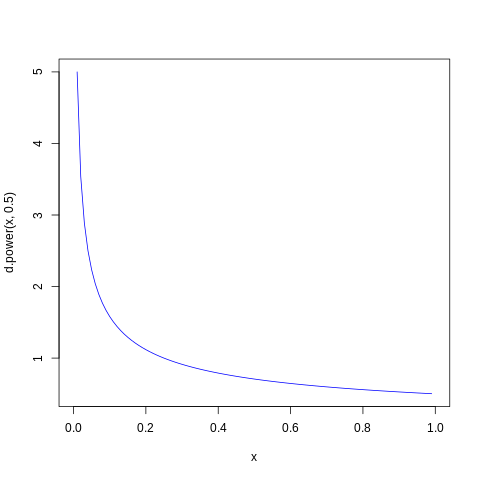

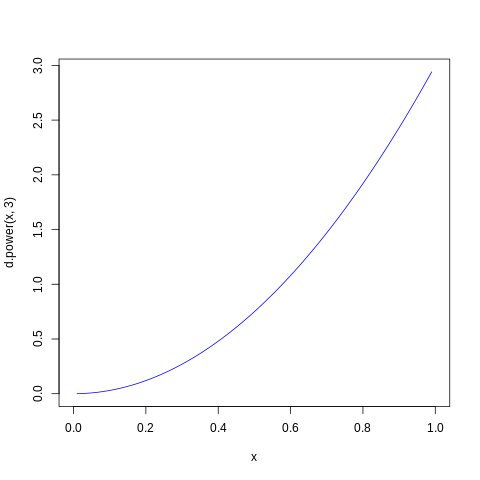

In [3]:
%%R
curve(d.power(x,0.5),from = 0 , to = 1, col='blue')
curve(d.power(x,3),from = 0 , to = 1, col='blue')

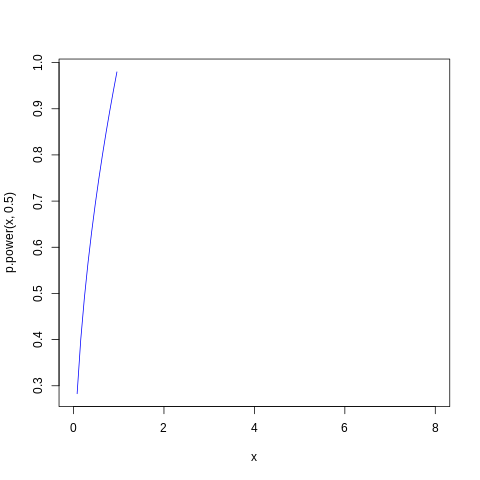

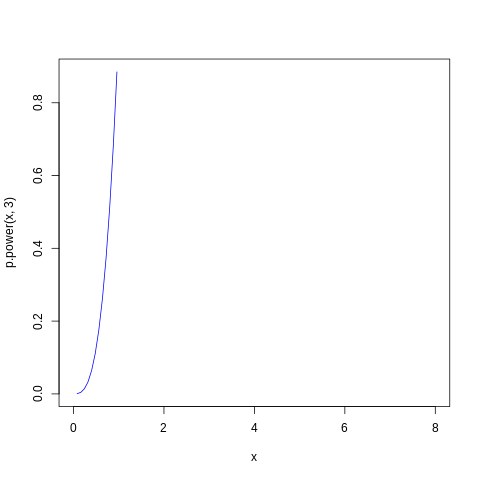

In [4]:
%%R
curve(p.power(x,0.5),from = 0, to = 8, col='blue')
curve(p.power(x,3),from = 0, to = 8, col='blue')

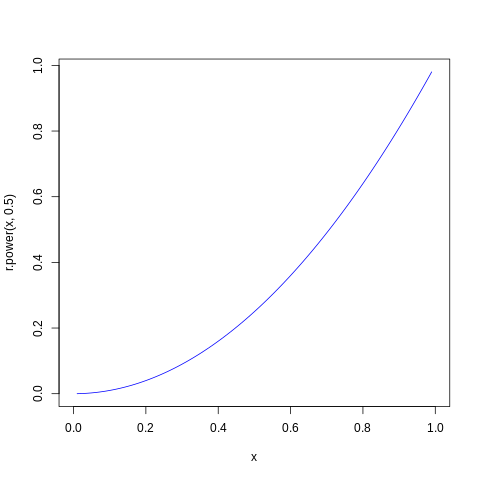

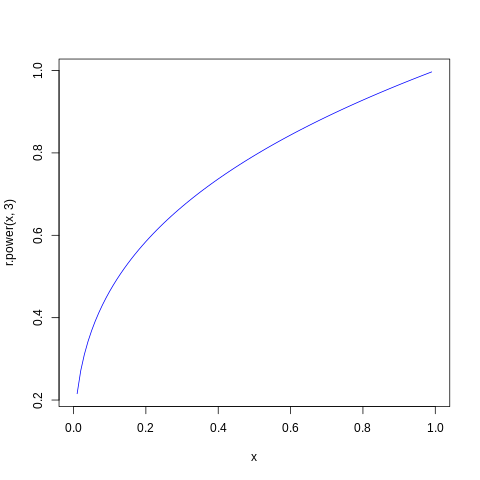

In [5]:
%%R
curve(r.power(x,0.5),from = 0, to = 1, col='blue')
curve(r.power(x,3),from = 0, to = 1, col='blue')

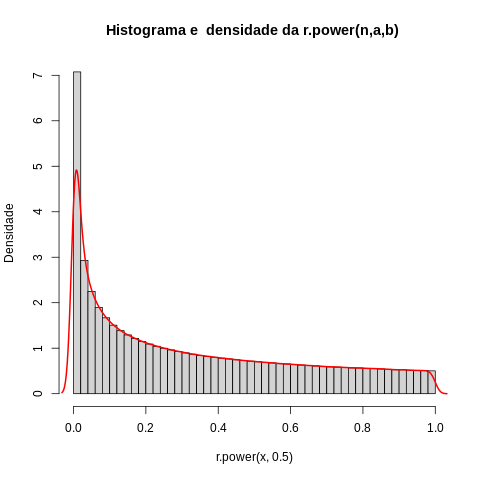

In [6]:
%%R
# Creamos o histograma
hist(r.power(x,0.5),  main = "Histograma e  densidade da r.power(n,a,b) ", ylab = "Densidade",50, prob =T)

# Calculamos a densidade
dx = density(r.power(x,0.5))

# Adicionamos a linha de densidade
lines(dx, lwd = 2, col = "red")

In [7]:
%%R
# Test de adeherencia b= 0.5
ks.test(r.power(x,0.5),y=p.power(x,0.5))


	Two-sample Kolmogorov-Smirnov test

data:  r.power(x, 0.5) and p.power(x, 0.5)
D = 0.47241, p-value < 2.2e-16
alternative hypothesis: two-sided



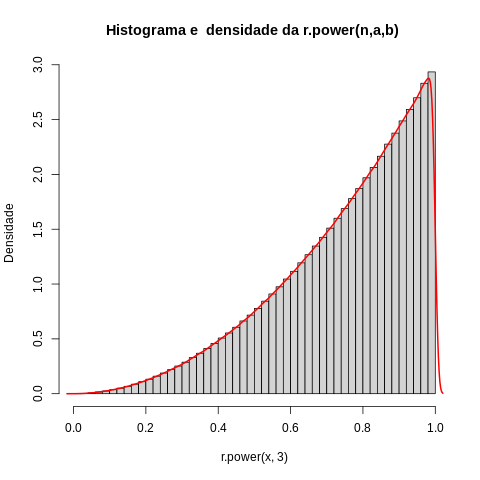

In [8]:
%%R
# Creamos un histograma
hist(r.power(x,3),  main = "Histograma e  densidade da r.power(n,a,b) ", ylab = "Densidade",50, prob =T)

# Calculamos la densidad
dx2 = density(r.power(x,3))

# Añadimos la línea de densidad
lines(dx2, lwd = 2, col = "red")

In [9]:
%%R
# Test de adeherencia b= 3
ks.test(r.power(x,3),y=p.power(x,3))


	Two-sample Kolmogorov-Smirnov test

data:  r.power(x, 3) and p.power(x, 3)
D = 0.67533, p-value < 2.2e-16
alternative hypothesis: two-sided



# Método de Montecarlo

#**b = 0.5**

In [11]:
%%R
#Valores Teoricos
#b=0.5
meanx_05 = (1/2)^(1/0.5)
#b=3
meanx_3 = (1/2)^(1/3)

In [12]:
%%R
meanx_05

[1] 0.25


In [13]:
%%R
meanx_3 

[1] 0.7937005


In [16]:
%%R
#h(x) = g(x)/f(x)= xf(x)/f(x)= x
h= function(x) r.power(x,0.5)

In [25]:
%%R
g= function(x) x*d.power(x,0.5)
integrate(g,0,1)

0.3333334 with absolute error < 0.00011


In [19]:
%%R
### Por Monte Carlo
I.chapeu = mean(r.power(x,0.5))
I.chapeu

[1] 0.3332536


In [21]:
%%R
#Intervalo de confiança
erro.padrao.I = sd(r.power(x,0.5))/sqrt(n)
IC = I.chapeu + qt(c(0.025, 0.975), n-1)*erro.padrao.I
IC

[1] 0.3330689 0.3334384


In [ ]:
%%R
### Variáveis Antitéticas
u = runif(n/2)
x = r.power(u,0.5) 
y = r.power(1-u,0.5) 
g.x = r.power(x,0.5) 
g.y = r.power(y,0.5)
z = (g.x + g.y)/2
(I.antit = mean(z))
(erro.antit.I = sd(z)/sqrt(n/2))
(IC.antit = I.antit + qt(c(.025, .975), n/2-1)*erro.antit.I)

[1] 0.1999206 0.2001448


# **b= 3**

In [ ]:
%%R
#h(x) = g(x)/f(x)= xf(x)/f(x)= x
h= function(x) r.power(x,3)
g= function(x) x*r.power(x,3)

In [24]:
%%R
g= function(x) x*d.power(x,3)
integrate(g,0,1)

0.75 with absolute error < 8.3e-15


In [23]:
%%R
### Por Monte Carlo
I.chapeu = mean(r.power(x,3))
I.chapeu

[1] 0.7499178


In [26]:
%%R
#Intervalo de confiança
erro.padrao.I = sd(r.power(x,3))/sqrt(n)
IC = I.chapeu + qt(c(0.025, 0.975), n-1)*erro.padrao.I
IC

[1] 0.7497978 0.7500379


In [28]:
%%R
### Variáveis Antitéticas
u = runif(n/2)
x = r.power(u,3) 
y = r.power(1-u,3) 
g.x = r.power(x,3) 
g.y = r.power(y,3)
z = (g.x + g.y)/2
(I.antit = mean(z))
(erro.antit.I = sd(z)/sqrt(n/2))
(IC.antit = I.antit + qt(c(.025, .975), n/2-1)*erro.antit.I)

[1] 0.8999773 0.9000351
